# SUPERHEROES NLP 

The superheroes NLP dataset comes from Kaggle : https://www.kaggle.com/jonathanbesomi/superheroes-nlp-dataset

From their description : 
"1400+ Superheroes history and powers description to apply text mining and NLP

**Context**

The aim of this dataset is to make text analytics and NLP even funnier. All of us have dreamed to be like a superhero and save the world, yet we are still on Kaggle figuring out how python works. Then, why not improve our NLP competences by analyzing Superheros' history and powers?

The particularity of this dataset is that it contains categorical and numerical features such as overall_score, intelligence_score, creator, alignment, gender, eye_color but also text features history_text and powers_text. By combining the two, a lot of interesting insights can be gathered!"

In this notebook I explore the dataset and it's features (EDA). 

Several and interesting things are discover through a torough exploratory analysis. 

In the end, my main focus was NLP embeddings, so this notebooks ends with exploration on word (for superpowers) and document (for superheroes) embedding analysis.

**Superheroes**

Thanks to this notebook we now know, and this is supported by the data, that superheroes that appear in the same anime/comic books have similar embeddings. 

Further, superheroes of the same universe share also similar embeddings. 

An small embedding size (10) suffices to distinguish between Marvel and DC comics superheroes.

**Superpower's** similarity appears in two forms: 
- Either the superpower is very similar (telepathy and telekinesis)
- Or the superpower appears in similar contexts, hence, we derive that it is complementary. Superheroes tend to be hollistic (physical strength, morality, intelligence ...).

#### Setting up

In [1]:
# Import Google drive ---
from google.colab import drive
drive.mount('/content/drive')

# LIBRARIES ------
import pandas as pd
# DATA ------ 
  # Locate data ---
PATH= "/content/drive/MyDrive/Colab Notebooks/NLP/Superheroes/superheroes_nlp_dataset.csv"
  # Read data ---
super=pd.read_csv(PATH)
  # Describe (rows -cols) ---
super.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,has_element_control,has_size_changing,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,79.103448,39.458621,46.389655,56.193103,66.913793,68.175862,0.090383,0.076645,0.075922,0.050615,0.083876,0.082430,0.133044,0.080260,0.109906,0.089660,0.120029,0.095445,0.148952,0.046999,0.090383,0.093999,0.169197,0.112798,0.155459,0.151121,0.122921,0.143167,0.152567,0.108460,0.102675,0.156905,0.135936,0.151844,0.146059,0.136659,0.135213,0.141721,0.229935,0.224873,0.262473,0.206074,0.241504,0.253796,0.320318,0.349964,0.266811,0.308026,0.409978,0.433116,0.428778,0.386840,0.511931,0.532899,0.562545,0.528561
std,25.048393,34.385566,29.205902,31.647711,33.225127,29.540420,0.286834,0.266124,0.264969,0.219289,0.277301,0.275117,0.339745,0.271794,0.312886,0.285798,0.325113,0.293934,0.356170,0.211714,0.286834,0.291932,0.375062,0.316460,0.362473,0.358296,0.328465,0.350370,0.359700,0.311073,0.303644,0.363843,0.342845,0.358999,0.353293,0.343612,0.342075,0.348890,0.420943,0.417650,0.440137,0.404630,0.428150,0.435340,0.466768,0.477131,0.442453,0.461844,0.492007,0.495686,0.495080,0.487203,0.500038,0.499097,0.496252,0.499364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,10.000000,25.000000,30.000000,40.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,30.000000,40.000000,55.000000,72.500000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

So the data has 81 columns. From Kaggle we know that each row has an unique superheroe. 

Some columns are binary (ex: "has_flight"), categorical (ex: "creator"), numerical (ex: "intelligence_score") and others have plain text ("history_text" and "powers_text" but also "superpowers" which is kind of already tokenized).

Let's take a look:  

In [2]:
# Print DF ---
super

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,superpowers,alter_egos,aliases,place_of_birth,first_appearance,creator,alignment,occupation,base,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,has_element_control,...,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,40,70,"['Super Speed', 'Super Strength']",[],[''],NaN,NaN,Marvel Comics,Good,NaN,NaN,"['Annihilators', 'Asgardians', 'Avengers', 'Ne...",NaN,Male,Human,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/10038.jpg?v=156096...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,35,100,"['Durability', 'Reflexes', 'Super Strength']","['Batgod', 'Batman', 'Batman (1966)', 'Batman ...","['Subject 514A', 'Bruce Wayne', 'Bruce 2']",NaN,NaN,DC Comics,NaN,NaN,NaN,[],Bruce Wayne (genetic template),NaN,NaN,-,-,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,100,80,"['Accelerated Healing', 'Agility', 'Berserk Mo...",[],['Rick Jones'],"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,Good,"Musician, adventurer, author; formerly talk sh...",NaN,"['Teen Brigade', 'Ultimate Fantastic Four', 'U...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,Male,Human,6'8 • 203 cm,980 lb • 441 kg,Yellow,No Hair,NaN,/pictures2/portraits/10/050/10060.jpg?v=158233...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,100,55,"['Energy Absorption', 'Energy Armor', 'Energy ...",[],[''],Stoneworld,Green Lantern Vol 3 #21,DC Comics,Good,NaN,NaN,"['Blue Lantern Corps', 'Green Lantern Corps', ...",NaN,Male,Human,-,-,NaN,NaN,NaN,/pictures2/portraits/10/050/1410.jpg?v=1581168103,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,30,50,"['Weapon-based Powers', 'Weapons Master']",[],[''],Gotham City,NaN,DC Comics,Good,NaN,NaN,[],NaN,Male,Human,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/11650.jpg?v=156173...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0

### Superpower analysis 

---

Let's do some exploration to get a feel of the data. I have a good feeling about the superpowers column. 

- Does each superheroe has a power ? intuition says yes, let's prove it 
- avg number of super powers 
- Most common superpowers  

In [3]:
# SUPERPOWER ANALYSIS ------
  # str to list --- 
super['superpowers']= [pd.eval(row, engine="python") for row in super.superpowers.values]
  # Print some --- 
super.superpowers

0                           [Super Speed, Super Strength]
1                  [Durability, Reflexes, Super Strength]
2       [Accelerated Healing, Agility, Berserk Mode, B...
3       [Energy Absorption, Energy Armor, Energy Beams...
4                   [Weapon-based Powers, Weapons Master]
                              ...                        
1445    [Cryokinesis, Fire Control, Magic, Probability...
1446    [Accelerated Healing, Acrobatics, Agility, Col...
1447    [Accelerated Healing, Agility, Durability, Ele...
1448    [Intangibility, Super Speed, Time Manipulation...
1449    [Absorption, Agility, Electrokinesis, Element ...
Name: superpowers, Length: 1450, dtype: object

In [4]:
  # Does every super has a superpower ---
empty_superpowers= [i == [] for i in super.superpowers.values]
print("Number of supers without superpowers", sum(empty_superpowers), "\n")
    # Subset to see ---
super.name[empty_superpowers].values

Number of supers without superpowers 67 



array(['Alfred Pennyworth', 'Black Eagle', 'Box III', 'Captain Cold (CW)',
       'Cecilia Reyes', nan, 'Chroma', 'Clock King', 'Colin Wagner',
       'Corsair', 'Danny Cooper', 'Dark Beast', nan, 'Fatale', 'Fixer',
       'Flash Thompson', 'Franklin Storm', 'Gemini V', 'Hepzibah',
       'HK-47', 'J. Jonah Jameson', 'Jack Bauer', 'Josiah Power',
       'Jyn Erso', 'Kingpin', 'Lodestone', 'M', 'Marrow', 'Martinex',
       'Mirage', 'Moloch', 'Morph', 'Night Thrasher', 'Nighthawk',
       'Paul Blart', 'Portal', 'Puma', 'Renata Soliz', 'Rev-9', 'Rictor',
       'Ronin', 'Ruby Thursday', 'Screaming Mimi', 'Skids', 'Slapstick',
       'Snake-Eyes', 'Splice', 'Stevie Hunter', 'Strong Guy',
       'Super Greg', 'The One', 'Tom Corsi', 'Turbo II',
       'Uatu the Guardian', 'Vagabond', 'Valerie Cooper', 'Vision II',
       'War Machine II', 'Warbird', 'Weapon Hex', 'Willie Lumpkin',
       'Wiz Kid', 'Wong', 'Wyatt Wingfoot', 'Yellow Claw',
       'Yellowjacket III', 'Yukio'], dtype=object)

As we see, there are superheroes without a superpower list. Since data is scrape, we don't know if they have superpowers not listed of if they don't have superpowers at all. 

We can get some summary statistics on the quantity of superpowers for each superheroe. 

In [5]:
  # Mean number of superpowers for each superheroe ---
number_of_superpowers=[len(row) for row in super.superpowers.values]
print("Min nb superpowers: ",min(number_of_superpowers))
print("Max nb superpowers: ",max(number_of_superpowers))
print("avg nb superpowers: ",sum(number_of_superpowers)/len(number_of_superpowers))

Min nb superpowers:  0
Max nb superpowers:  126
avg nb superpowers:  14.324827586206897


Which superpowers are the most common across superheroes. For this we have to use a Counter. 

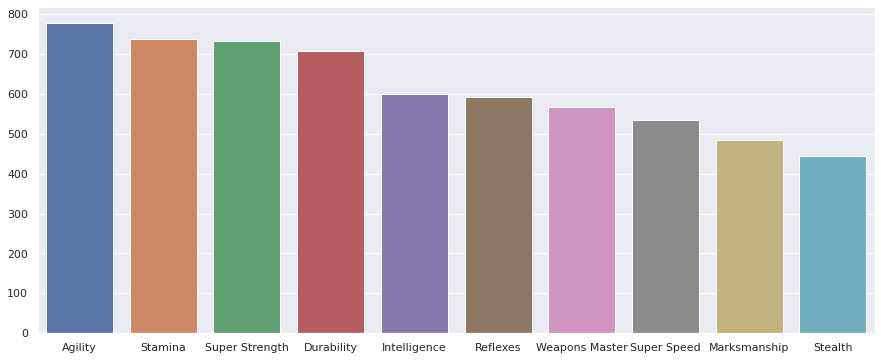

In [6]:
# LIBRARIES ------
from collections import Counter
from pandas.core.common import flatten
import seaborn

  # Most common superpowers ------
      # Flatten the superpowers
list_of_superpowers=list(flatten(super.superpowers.values))
superpower_count=Counter(list_of_superpowers)
      # Most common supers
top= superpower_count.most_common(10)
top_dict= dict(top)
      # Visualize most common supers 
seaborn.set(rc={'figure.figsize':(15,6)})
seaborn.barplot(x=list(top_dict.keys()), y=list(top_dict.values()))

This is interesting: Agility, Stamina and Super strength. Clearly we can all think of a superheroe that has these abilities. 

### Numerical scores Analysis 

---
Let's understand the relationship and distribution of these variables.  

- Plotting as a scatter matrix

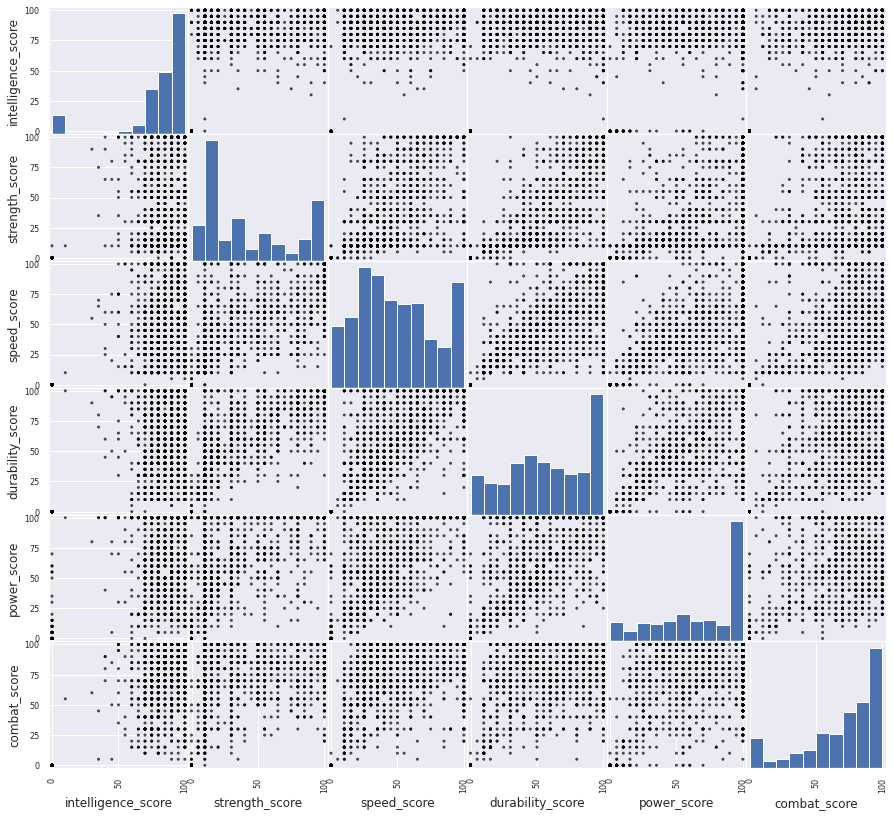

In [7]:
# Plot Scatter matrix ---
from pandas.plotting import scatter_matrix

scores_data= super[['intelligence_score', 'strength_score', 'speed_score',
       'durability_score', 'power_score', 'combat_score']]

scatter_matrix(scores_data, figsize=(15, 14), alpha= 0.7, c= 'black');

- Intelligence Score and Power seem to be independent from other scores 
- Strengh seems to be somewhat related to speed and durability
- Speed also appears to have some relationship with durability

Separating Marvel from DC didn't show some obvious differences between marvel and DC. 


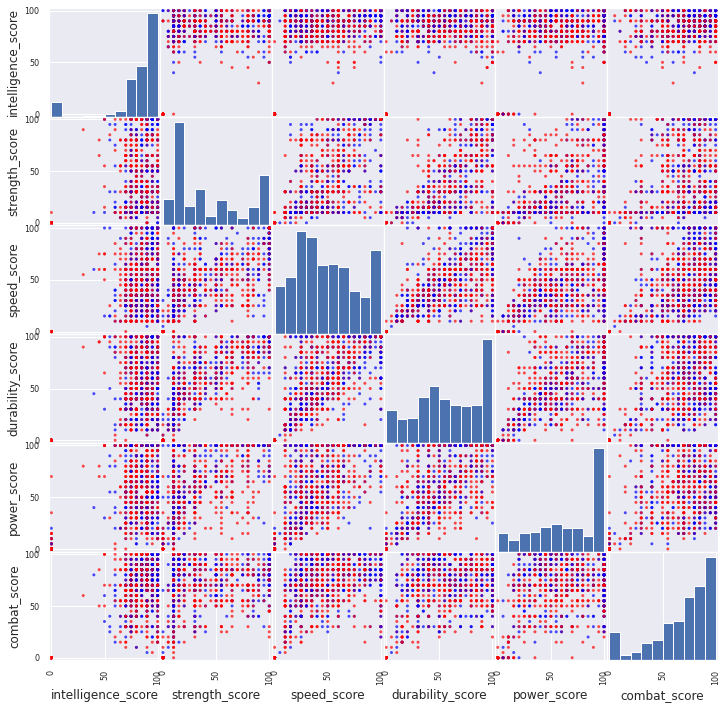

In [8]:
# Plot Scatter matrix by creator DC or Marvel ---
from pandas.plotting import scatter_matrix

subset_super= super.loc[super['creator'].isin(['Marvel Comics', 'DC Comics'])].copy()

colors = {'Marvel Comics': 'red', 
          'DC Comics': 'blue'}
scatter_matrix(subset_super[['intelligence_score', 'strength_score', 'speed_score',
       'durability_score', 'power_score', 'combat_score']], figsize=(12, 12), alpha= 0.7, c= subset_super['creator'].map(colors));

Let's see the actual correlation matrix. 

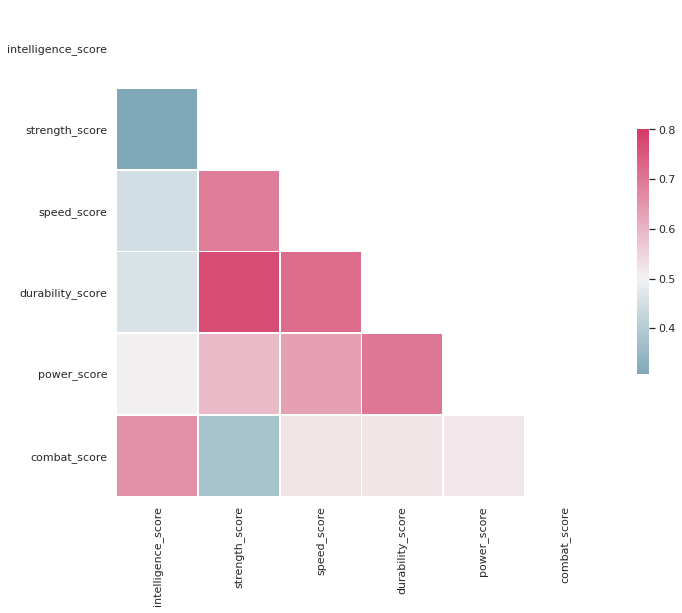

In [9]:
# LIBRARIES ------
import numpy as np
import matplotlib.pyplot as plt

seaborn.set_theme(style="white")

# Compute the correlation matrix
corr = scores_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(224,0, n=16, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
seaborn.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Our intuition seeing the scatter plot was right. Strenght and durability are indeed highly correlated. Durability and speed are also highly correlated. 

Let's see the actual numbers: 

In [10]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
intelligence_score,1.00,0.31,0.45,0.46,0.50,0.66
strength_score,0.31,1.00,0.69,0.77,0.59,0.38
speed_score,0.45,0.69,1.00,0.72,0.63,0.52
durability_score,0.46,0.77,0.72,1.00,0.70,0.52
power_score,0.50,0.59,0.63,0.70,1.00,0.52
combat_score,0.66,0.38,0.52,0.52,0.52,1.00


As we saw earlier just by looking at the scatter plot, strength and durability are positively correlated. 

Speed and durability are also highly positively correlated (we also noted this looking at the scatter plot). 

Other strong relationships that can be noted are: **Speed & Strength**, **Power & Durability** and **combat and intelligence**.  

Another important fact is that everything is positively correlated, that is, superheroes tend to be more and more capable (higher scores at multiple characteristics). Another way to look at this is that these characteristics are not exclusive, like for example (more power results in an slower superheroe). 

If we plot a heatmap of the columns, we can see that they tend to increase simultaneously. Specially, strength, speed, durability and power. 

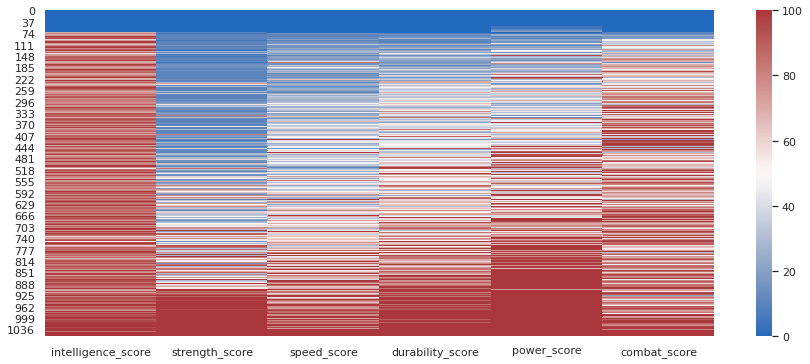

In [11]:
# Sort by sum of features ---
subset_super["sum_of_features"]= subset_super.sum(axis=1)
subset_super.sort_values("sum_of_features", inplace=True, ascending=True)
subset_super.reset_index(drop=True,inplace=True)
# heatmap ---
seaborn.heatmap(subset_super[['intelligence_score', 'strength_score', 'speed_score',
       'durability_score', 'power_score', 'combat_score']], cmap= seaborn.cm.vlag,vmin=0, vmax=100, center=50)

## Text information 
-------------------

We will know focus on the text data. The goal is to gain more insights about this data set exploring the language columns available. 

We can separate this in two parts: 

First, we'll look at the superpowers column, this column is already tokenized and presented in the form of a list of tokens (superpowers).  
- Get the superpower vectors for each one
- Find similar superpowers by the distance between embeddings
- Plot a sankey Diagram to visualize the similar embeddings 
- Perform PCA to the embeddings and visualize the closeness in two dimensions.

Second,  we will use the history and powers columns. These columns are plain text ones. Not all Superheroes have one. Since the combination of the the columns will end up being a document, we will have a document embedding representing the characteristics of each superheroe.  

- Bind powers and history 
- Get document vectors for each superheroe's history
- Try plotting on grouping var (creator, good_bad, gender)

In [12]:
# LIBRARIES ------
!pip install --upgrade  # to have 4.0 version
import gensim.models as g


ERROR: You must give at least one requirement to install (see "pip help install")


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Let's define a W2V model. We try some thresholds to exlude some infrequent values.  

In [13]:
# Define a Word2Vec model ---
superpowers_model= g.Word2Vec(sentences=list(super.superpowers.values), vector_size=30, window=3, min_count=5, workers=2, epochs= 200)
# Vocab ---
vocab=superpowers_model.wv.key_to_index.keys()
# Embedding shape ---
print("Embedding Shape: ",superpowers_model.wv.vectors.shape)
# Extract embeddings ---
embeddings=superpowers_model.wv.vectors
# To DF ---
embeddings_df=pd.DataFrame(embeddings)
embeddings_df.index=list(vocab)

Embedding Shape:  (241, 30)


Earlier we ordered the superpowers by frequency. 

With the word vectors we can calculate which other superpowers have the least distance to the 10 most common superpowers. 

So, for example, the closest superpower to Agility is Dexterity and then Accelarated Healing. For Stamina it is Super Strength and Stealth. 

In [14]:
# Calculate the 2 most similar superpowers for each of the top 10 most common superpowers ---
[print(word,superpowers_model.wv.most_similar(word, topn=2)) for word in list(top_dict.keys())]

Agility [('Accelerated Healing', 0.7523947358131409), ('Dexterity', 0.7366420030593872)]
Stamina [('Reflexes', 0.8416011333465576), ('Shapeshifting', 0.7952687740325928)]
Super Strength [('Super Speed', 0.8167093992233276), ('Stamina', 0.7614831924438477)]
Durability [('Empathy', 0.7957534193992615), ('Endurance', 0.7799844145774841)]
Intelligence [('Longevity', 0.8553776144981384), ('Jump', 0.843829333782196)]
Reflexes [('Stamina', 0.8416010737419128), ('Self-Sustenance', 0.7887687087059021)]
Weapons Master [('Weapon-based Powers', 0.7893288135528564), ('Wallcrawling', 0.6180520057678223)]
Super Speed [('Super Strength', 0.8167092204093933), ('Stamina', 0.7768223881721497)]
Marksmanship [('Longevity', 0.8219026923179626), ('Jump', 0.7689418196678162)]
Stealth [('Stamina', 0.7931342720985413), ('Reflexes', 0.7593287229537964)]


[None, None, None, None, None, None, None, None, None, None]

I feel that this could be better visualized. Let's turn this to a DF. 

In [15]:
# Get the 30 most common ---
start= list(dict(superpower_count.most_common(30)).keys())
# Find the most similar super ---
end1= [superpowers_model.wv.most_similar(word, topn=1)[0][0] for word in list(dict(superpower_count.most_common(30)).keys())]
# Find the second most similar super ---
end2= [superpowers_model.wv.most_similar(word, topn=2)[1][0] for word in list(dict(superpower_count.most_common(30)).keys())] # Just realized this could have been calculated once.
# Turn to a DF ---
flow_df= pd.DataFrame([start, end1, end2]).transpose()
flow_df.columns= ["Most_common_word","Most_similar_1","Most_similar_2"]
flow_df

,Most_common_word,Most_similar_1,Most_similar_2
0,Agility,Accelerated Healing,Dexterity
1,Stamina,Reflexes,Shapeshifting
2,Super Strength,Super Speed,Stamina
3,Durability,Empathy,Endurance
4,Intelligence,Longevity,Jump
5,Reflexes,Stamina,Self-Sustenance
6,Weapons Master,Weapon-based Powers,Wallcrawling
7,Super Speed,Super Strength,Stamina
8,Marksmanship,Longevity,Jump
9,Stealth,Stamina,Reflexes


This is great but I would like it to be a long table for viz purposes. 

I want to make a Sankey Diagram to better recognize the relationships and the flow to certain superpowers. It is, for some things, easier to understand than the table above

In [16]:
# PIVOT LONG ------
  # Pivot flow_df to have similar embeddings as one column 
flow_df_pivoted=pd.wide_to_long(flow_df,stubnames="Most_similar_", i='Most_common_word', j="Similarity")
  # Add a value column where the value of the first most similar emb is greater than the value of the second most similar (to emphasize the plotting)
flow_df_pivoted["Value"]= np.concatenate((np.repeat(10,len(start)),np.repeat(5, len(start))))

flow_df_pivoted.head(),flow_df_pivoted.tail()

(                                   Most_similar_  Value
 Most_common_word Similarity                            
 Agility          1           Accelerated Healing     10
 Stamina          1                      Reflexes     10
 Super Strength   1                   Super Speed     10
 Durability       1                       Empathy     10
 Intelligence     1                     Longevity     10,
                                   Most_similar_  Value
 Most_common_word    Similarity                        
 Immortality         2           Heat Resistance      5
 Energy Absorption   2             Energy Blasts      5
 Energy Manipulation 2             Energy Blasts      5
 Teleportation       2               Telekinesis      5
 Telepathy           2               Super Speed      5)

In [17]:
# NEEDED FOR PLOTLY ---
# Labels ---
labels= start 
labels_length=len(labels)
# Sources --- 
sources= list(range(len(start)))
sources = list(range(len(start)))*2

# Lookups ---
sources_dict= dict(zip(flow_df_pivoted.index, range(len(start))))
end_dict={key:value+labels_length for value,key in enumerate(set(flow_df_pivoted.Most_similar_))}
end_length= len(end_dict)

# Targets ---
targets= [end_dict[most_similar_] for most_similar_ in flow_df_pivoted.Most_similar_]

# Aesthetics ---
values= flow_df_pivoted.Value.values
colors= np.concatenate((np.repeat("#ffb088", len(start)),np.repeat("#8dd9ff", len(start))))
colors_nodes= np.concatenate((np.repeat("#F2F7F8", len(start)),np.repeat("#F2F4F8", len(end_dict))))

# Labels 
labels=start+list(end_dict.keys())


In [18]:
# LIBRARIES ------
import plotly.graph_objects as go
# Making a Sakey Plot ---
sub=go.Layout(margin_b=100,title="Most common superpowers and their most similar embeddings", font_size=20, width=1100, height=900,
              annotations = [dict(xref='paper',
                                        yref='paper',
                                        x=0, y=-.08,
                                        showarrow=False,
                                        text ='Orange represent an smaller distance (most similar). Blue represent the second smaller distance',
                                  font_size=15)])
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 20,
      thickness = 20,
      line = dict(color = "black", width = 0.6),
      label = labels,
      color = colors_nodes
    ),
    link = dict(
      source = sources, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = targets,
      value = values ,
      color= colors,
      line = dict(color = "black", width = 0.2),
  ))],
  layout= sub)

fig.show()


### Reading the plots and tables about superpowers  

As we can see, from the tables or the sankey plot, there are some relationships that are worth mentionning. 

#### Closeness of similar superpowers
All seem very interesting right from the start, **"Energy manipulation"** is very close to other types of energy powers like "Energy Blasts" and "Energy Beams". In the context of the Word2Vec model that we trained, this would mean that superheroes commonly have the latter powers when they have "Energy manipulation" abilities. 

Other superpower embeddings are very closely linked to similar ones, for example, the closest superpower to **"Teleportation"** is "Telekinesis", the second closest is "Telepathy". All of them are superpowers that involve some extraordinary trait of the mind. 

Lastly, "Self-sustenance" and "Resurrection" often appear in superheroes that have a **"Regeneration"** superpower.  

#### Complementary of the superpowers  

Some superpowers, however, seem rather complementary. The fact that they are highly linked (appear in the same context) is very interesting. Often superheroes have several abilities (mind and body) because of their extraordinary nature. 

The second most similar embedding of **"Inmortality"** is "Heat resistance", which corresponds to the first category I described, but actually the most similar embedding of this ability is "Intelligence", which has nothing to do with the body's resistance to extreme conditions. 

In the same way, **"Cold resistance"** is associated with "dexterity",**"Intelligence"** with "Jump", **"Agility"** with "Danger Sense" and **"Endurance"** with "empathy".

#### Common close superpowers 

Lastly, we could note that Stealth(4/30), Super Strength(3/30), Jump(3/30), Longevity(3/30), Invulnerability(3/30) are commonly similar superpowers to the top 30 superpowers among superheroes. They appear in the "similar" and "complementary" types that we described. They have the largest number of links.

#### Reducing the dimensionality  


Another way to visualize the characteristics of the superpowers through their closeness is to reduce the embedding space to less dimensions and plot them in those dimensions. 

As usual we will make an scree plot to decide the number of dimensions we will keep with PCA. 

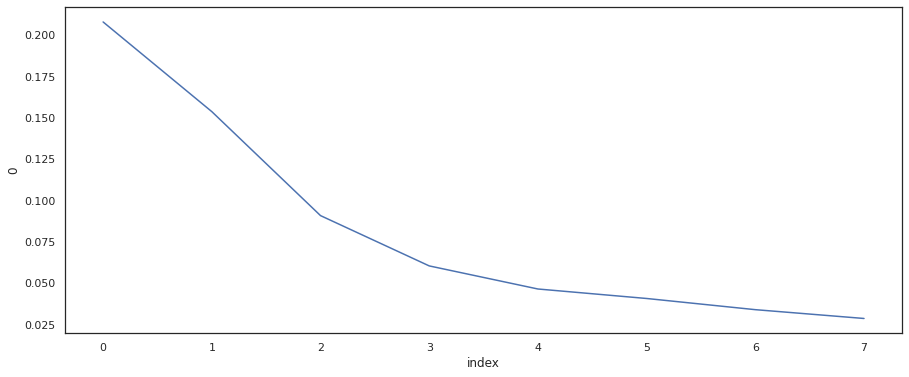

In [19]:
# LIBS ------
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
embeddings_pca=pca.fit_transform(embeddings_df)

# Scree plot ---
df_var_explained=pd.DataFrame(pca.explained_variance_ratio_).reset_index(level=0)
seaborn.lineplot(data=df_var_explained, y=0, x="index") # I'm going to go with 3 
# Fit again ---
pca = PCA(n_components=3)
embeddings_pca=pca.fit_transform(embeddings_df)

Now that we have the vectors, we can make turn this to a DF. 
With this we can plot the superpowers in two dimensions and see which ones are close. 

We will use adjustText to automatically set the labels alongside the markers for each superpower. 

Lastly, we only plot the first 100 most common superpowers and not the 241 that we have so that it is easier to read.

In [20]:
# PCA to DF ------
pca_df= pd.DataFrame(embeddings_pca, columns=["first_dim", "second_dim","third_dim"])
pca_df["labels"]= embeddings_df.index # Get the labels

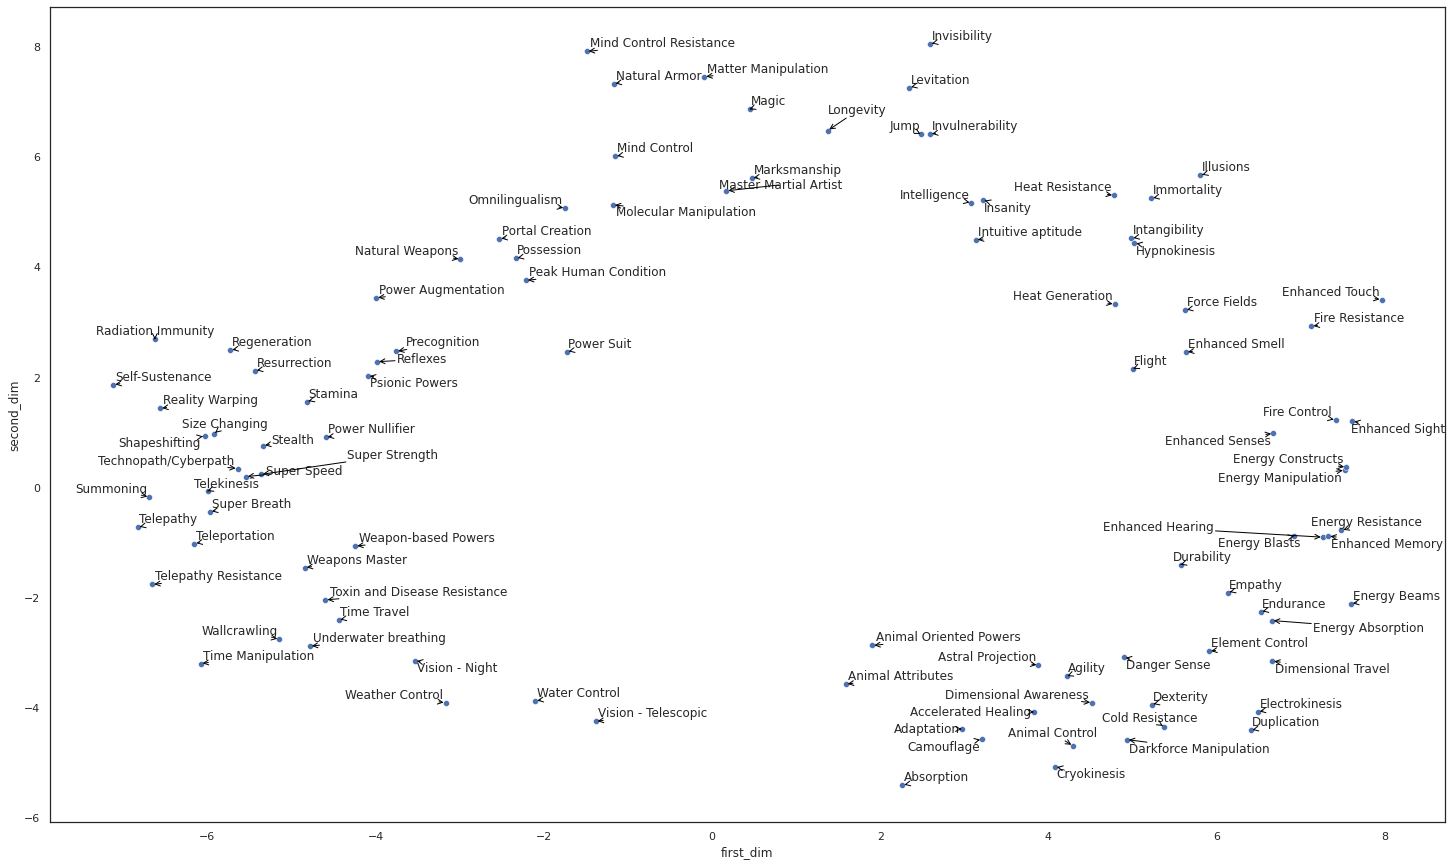

In [21]:
# LIBRARIES ------
!pip install adjustText # Like ggrepel
from adjustText import adjust_text 
# Fun to put labels ---
def make_labels(x,y,z,data):
  texts = [plt.text(data[x][i], data[y][i], data[z][i], ha='center', va='center') for i in range(data.shape[0])]
  adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

# PLOT ------
  # Size ---
f, ax = plt.subplots(figsize=(25, 15))
  # Scatter ---
seaborn.scatterplot(data=pca_df[:100], x="first_dim", y= "second_dim")
  # Add labels to points ---
make_labels("first_dim", "second_dim", "labels", pca_df[:100]) # takes a little while ~ 



It is interesting to see that superpowers are blasted away from the center. 

- In the lower left quadrant we have the mind powers (telepathy, teleportation,..) as well as elements' crontol (underwater breathing, weather control, water control, vision, and probably time manipulation). 
- In the upper left quadrant we find some resistance (self sutenance, ressurection, regreneration) and strength (Stamina, super strength, super speed) superpowers. Also interestingly we find human abilities (close to superpowers) together (peak human condition, martial arts, markmanship). 


- In the lower right quadrant we recognize animal powers, energy powers, and ingenuity abilities (agility, dexterity, camouflage). Going up the the upper quadrant we find some enhanced but common senses (hearing, memory,smell).
- Finally, in the upper right quadrant we can distinguish cleverness (intuitive aptitude and intelligence) and space moving (jump, flight , levitation, and possibly invisibility) powers. 

Altough the separation is not always perfect, the principal components of the superpowers embeddings yielded some logical separations in only 2 dimensions. These dimensions where obtained only looking at the context of appearence of the superpowers. 

Let's have some fun with a 3d plotly. 

We note that altough superpowers in the lower quadrants (left, right) were close in the second dimension, they are far apart in the third dimension (as well as the first, but this we already know). The same goes to the upper (left, right) quadrants. 

This leave us with some questions about the observations, for example, animal powers and telepathy powers, altough close in the second dimension are far away in the first and third dimension. Maybe the second dimension encapsulates traits of control of external things.

In [22]:
# 3d plotly ---
import plotly.express as px
fig = px.scatter_3d(pca_df[:100], x='first_dim', y='second_dim', z='third_dim',  text="labels",width=1100, height=900)
fig.show()


### Plain text columns 

we will use the columns : history_text and powers_text. In order to use just one column, we will paste (or concatenate) both columns into one. 

Superheroes that do not have any text after the combination of columns will be excluded. 

We hope to learn about the superheroes by embedding their history description. My intuition tells me that the history is a big influence for good or bad alliance of the superheroe.  

In [23]:
# LIBRARIES ---
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from spacy.lang.en import English
# Helper concatenate fun ---
def add_history_power_text(x,y):
  res= []
  for i in range(super.shape[0]):
    if isinstance(super[x][i],float) and isinstance(super[y][i],float): # both nan
      res.append('')
    elif isinstance(super[x][i],float) and not isinstance(super[y][i],float): # x nan, y !nan
      res.append(super[y][i])
    elif not isinstance(super[x][i],float) and isinstance(super[y][i],float): # x !nan, y nan
      res.append(super[x][i])
    else: # no nans
      res.append(super[x][i]+ super[y][i])
  return(res)

concat_text=add_history_power_text("history_text", "powers_text")
concat_text_bool= [False if text=='' else True for text in concat_text ]
no_text = [i for i, x in enumerate(concat_text_bool) if not x]
print("supers without concatenated text:",len(no_text))

# Since now all supers have a text to work with, we can simply add a column 
super["concat_text"]= concat_text
# Tokenize ---
nlp = English()
docs = list(nlp.pipe(concat_text))
concat_text_clean = [[w.lemma_ for w in doc if (not w.is_stop and not w.is_punct and not w.like_num)] for doc in docs]
# Train a doc2vec ---
  # Tagged Document --
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(concat_text_clean)]
  # Define and train model --
model = Doc2Vec(documents, vector_size=10, window=10, min_count=2, workers=2,epochs=100)

supers without concatenated text: 0


In [24]:
# Retrieve the embeddings --- 
vectors = model.dv.vectors
print("Embeddings size:",model.dv.vectors.shape)
vectors_df= pd.DataFrame(vectors)
# Get the name of the embeddings --- 
heroes= list(super.name.values) # Model maintains sorting 
# Not all heroes have a name ---
index_non_nan= [isinstance(heroe,str) for heroe in heroes]
# Grouping vars ---
super_non_nan= super.iloc[index_non_nan, :]
  # *Scores ---
score= super_non_nan.overall_score.values # not numeric
score=[np.nan if number== '-' else 500 if number=='∞' else int(number) for number in score]
  # *Creator ---
creator=super_non_nan.creator.fillna('Unknown').values
  # *Alignment ---
alignment= super_non_nan.alignment.fillna('Unknown').values
  # *Gender ---
gender=super_non_nan.gender.fillna('Unknown').values
  # *Type Race ---
type_race= super_non_nan.type_race.fillna('Unknown').values

# Update vectors df 
vectors_df.index=heroes 
vectors_df=vectors_df.iloc[index_non_nan, :]
print("Final shape:", vectors_df.shape)

# Creator subset ---
creator_to_subset= list(dict(Counter(super_non_nan.creator.values).most_common(2)).keys())
condition_creator= super_non_nan.creator.isin(creator_to_subset)
creator_subset= super_non_nan[condition_creator].creator.values

Embeddings size: (1450, 10)
Final shape: (1448, 10)


Let's calculate the cosine similarities bewteen all pairs of heroes (across every dimension). 

In [25]:
# COSINE SIMILARITY SCORE BETWEEN HEOROES EMBEDDINGS ------
from sklearn.metrics.pairwise import cosine_similarity
cos=cosine_similarity(vectors)
print("Cosine similarity matrix shape", cos.shape)

Cosine similarity matrix shape (1450, 1450)


The problem is that the matrix is very high dimensional. We can't visualize something with 1450 rows and understand something. 

We could just filter the table and get the most similar for some heroes. 

What we could also do is filter the rows, columns (superheroes) and accept only those who have very strong relationships.

In [26]:
# Cosine similarity matrix to DF --- 
cos_df=pd.DataFrame(cos, columns=heroes)
cos_df.index=heroes
cos_df= cos_df.iloc[index_non_nan, index_non_nan] # remove nan heroes
cos_df
# Cosine DISTANCE matrix to DF ---
cos_df_distance= pd.DataFrame(np.round_((1-cos),4)) # Distance distance=(1-similarity) 
cos_df_distance.index=heroes
cos_df_distance= cos_df_distance.iloc[index_non_nan, index_non_nan] # remove nan heroes

In [27]:
# LIBRARIES ---
from itertools import combinations
# Correlation matrix on the similarity matrix---
corr=cos_df.corr()
# Filter fun ---
def absHighPass(df, absThresh):
    passed = dict()
    for (r,c) in combinations(df.columns, 2):
      if (abs(df.loc[r,c]) >= absThresh and r is not c): # if r == c, then value (similarity) == 1 
            if r not in passed: 
              passed[r]= 0
            if c not in passed: 
              passed[c]= 0
            if r in passed:
              passed[r]+=1
            if c in passed:
              passed[c]+=1
    vals=list(passed.values())
    vals=np.where(np.array(vals)>60,True, False) # For a superheroe to be plotted, we would have to have more than 60 very high or very low correlation to other supers
    passed=list(np.compress(vals, list(passed.keys()), axis=0)) # filter by boolean
    print("N superheroes passsed: ", len(passed))
    return df.loc[passed,passed]

corr_influencial= absHighPass(corr,0.8) # Apply fun. High th
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_influencial, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20),dpi = 480)

# Draw the heatmap with the mask and correct aspect ratio
seaborn.heatmap(corr_influencial, mask=mask, cmap=seaborn.cm.vlag, vmax=1, center=0,
            square=True, cbar_kws={"shrink": .5}, xticklabels=1, yticklabels=1)

Output hidden; open in https://colab.research.google.com to view.

The absHighPass function we defined helpped reducing the variables to plot. We certainly lost a lot of information on the way, but we can still learn some things. At least we have the superheroes with a lot of high magnitude relationships plotted. 

We have to remember that the correlation is calculated from the similarity matrix of the history embeddings. That is, two superheroes will be highly correlated if they have, in general, a close similarity to all others superheroes (same relationships to other supers).  On that, two superheroes have a high similarity if their documents embeddings predicted the same kind of words context (same context, or similar history).

There are a lot of supers that I don't know, but still it seems that the unsepervised embeddings yielded a good measure. 

- Batman characters are highly correlated. 
- Ninjago characters are also very highly related to one another. 
- It is interesting to see that Naruto characters are correlated with Ninjago characters (both ninja worlds. Naruto characters are also correlated with other Naruto characters). (this can vary from run to run, sometimes naruto characters do not appear).
- X men characters ere highly correlated. 

Overall : 

- DC comics superheroes appear to be highly correlated even across different comic books. 
- Some Marvel and Fox superheroes are negatively correlated with DC comics superheroes, specially batman related ones.

I also tried other settings in the filter function and found, for example: 

- Every type of Hulk is highly related to other hulks
- The flash characters are also highly correlated 
- Green lantern's character also seem to be highly correlated...

#### Dimension reduction 



As with the word vectors, we will try a dimension reduction. 

array([0.20289786, 0.3621213 , 0.5096946 , 0.6290349 , 0.74223745,
       0.83510995], dtype=float32)

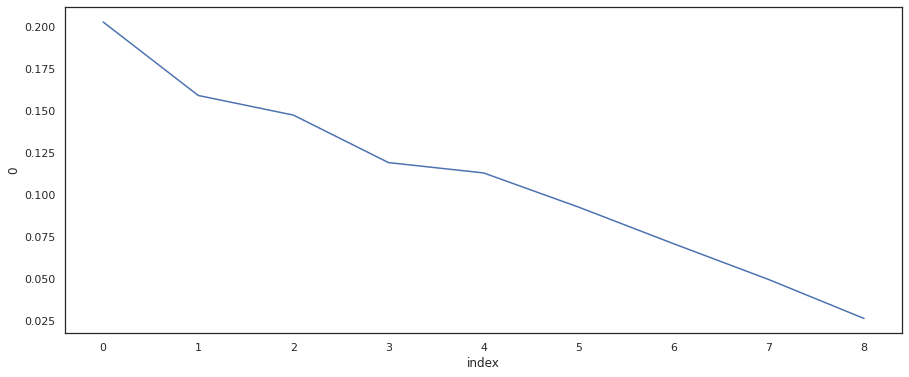

In [28]:
# LIBS ------
pca = PCA(n_components=9) # Try a high number first
history_embeddings_pca=pca.fit_transform(vectors_df) # fit the document vectors ---

# Scree plot ---
df_var_explained=pd.DataFrame(pca.explained_variance_ratio_).reset_index(level=0) 
seaborn.lineplot(data=df_var_explained, y=0, x="index") # This time i'm going with 
# Fit again ---
pca = PCA(n_components=6)
history_embeddings_pca=pca.fit_transform(vectors_df)
# PCA to DF ------
pca_df= pd.DataFrame(history_embeddings_pca, columns=["first_dim", "second_dim","third_dim", "fourth_dim","fifth_dim","sixth_dim"])
pca_df["labels"]= vectors_df.index.values # Get the labels
# Although this not not explain all variance 
np.cumsum(pca.explained_variance_ratio_)

We did not get the plateau of dimension importance that we expected. For modeling purposes it would be best to use the 10 dimensions that we have. 

Still if we reduce from 10 to 6 dimension, we get to keep variables that explain 84 % of variance. 

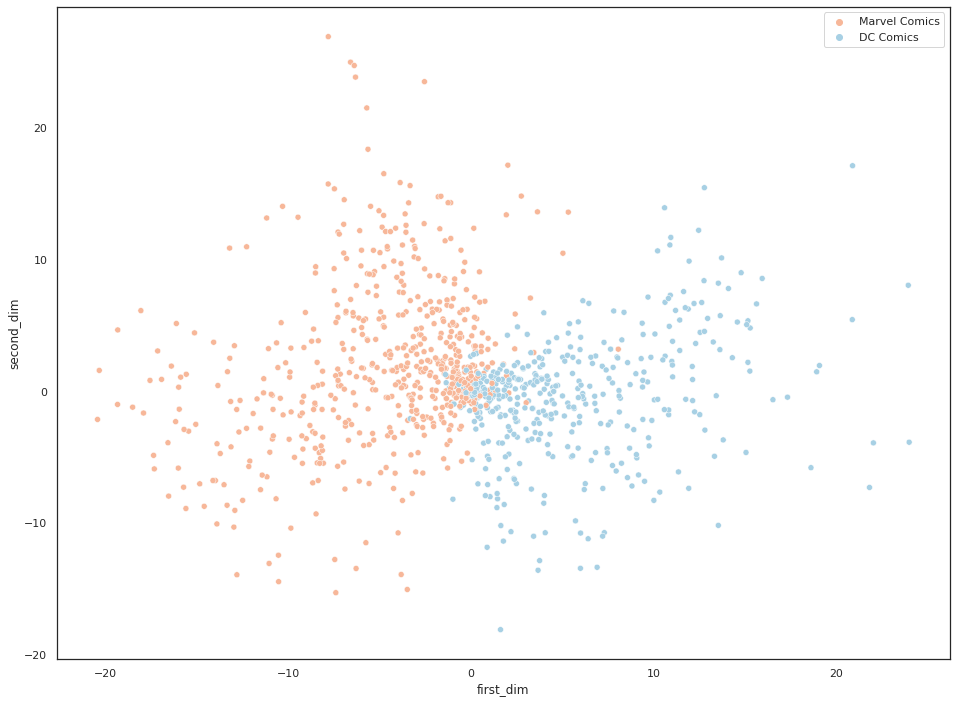

In [29]:
# PLOT ------
  # Size ---
f, ax = plt.subplots(figsize=(16, 12))
# Vars 
pca_df["score"]=score
pca_df["alignment"]=alignment
pca_df["gender"]=gender
  # Scatter ---
plot= seaborn.scatterplot(data=pca_df[condition_creator.values], x="first_dim", y= "second_dim", hue=creator_subset, palette='RdBu')



The first dimension seems to separate DC from Marvel!

Other grouping variables can not be separated easily. Maybe not removing stopwords could help. (for ex, "she" or "he" was surely removed, but convey important information about gender). 

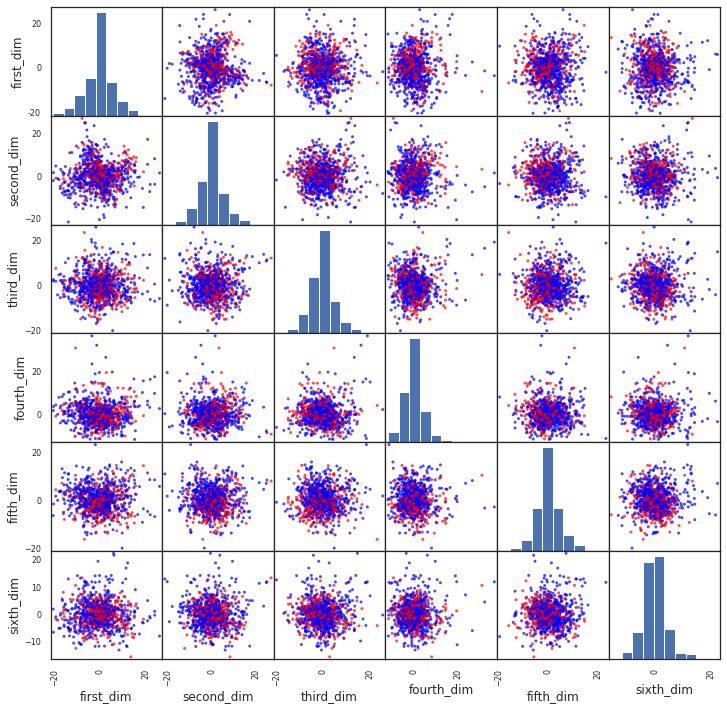

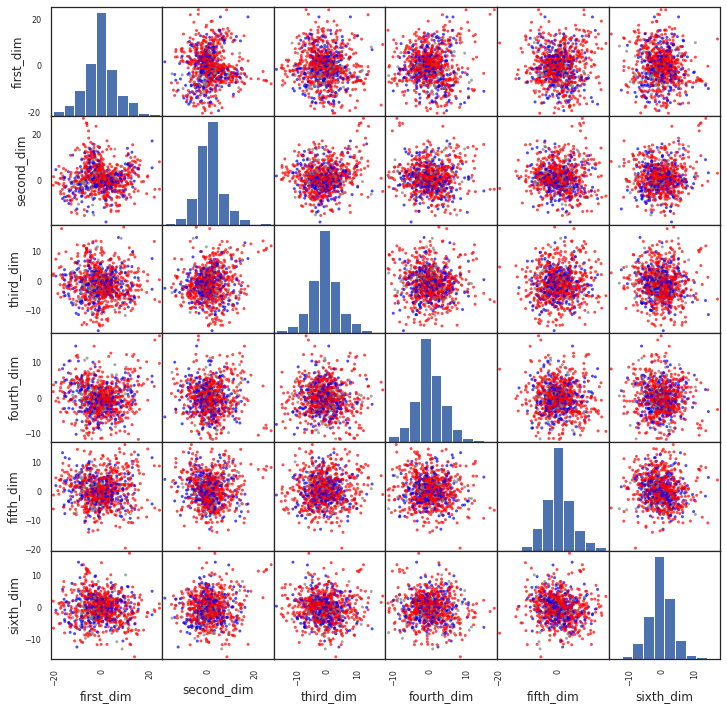

In [30]:
# Sadly there is a lot of noise for other grouping vars: 
# What did not work: 
# Try to distingush alignment from the document vectors. (at least visually, a model could possibly do it).
colors = {'Bad': 'red', 
          'Good': 'blue'}
scatter_matrix(pca_df[pca_df['alignment'].isin(["Good","Bad"])][['first_dim', 'second_dim', 'third_dim', 'fourth_dim', 'fifth_dim',
       'sixth_dim']], figsize=(12, 12), alpha= 0.7, c= pca_df[pca_df['alignment'].isin(["Good","Bad"])]['alignment'].map(colors));
# Gender 
colors = {'Male': 'red', 
          'Female': 'blue',
          'Unknown':'gray'}
scatter_matrix(pca_df[condition_creator.values][['first_dim', 'second_dim', 'third_dim', 'fourth_dim', 'fifth_dim',
       'sixth_dim']], figsize=(12, 12), alpha= 0.7, c= pca_df[condition_creator.values]['gender'].map(colors));